In [58]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [61]:
# NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf = df.drop(['deck', 'embark_town'], axis = 1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [62]:
# age 열에 나이 데이터가 없는 모든 행 삭제 - age 열(891 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

714


In [63]:
# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

S


          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000

In [64]:
# 분석에 활용할 열(속성) 삭제
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [65]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [66]:
# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
         'town_C', 'town_Q', 'town_S']] # 설명변수 X
y = ndf['survived'] # 예측변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('train data 개수: ', x_train.shape)
print('test data 개수: ', x_test.shape)

train data 개수:  (571, 9)
test data 개수:  (143, 9)


In [67]:
# train, validation 분류 7:3
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3)

print(f'훈련데이터 {x_train.shape}, 테스트데이터 {x_test.shape}, \
검증데이터 {x_val.shape}')

훈련데이터 (399, 9), 테스트데이터 (143, 9), 검증데이터 (172, 9)


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 9차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
# 층 만들기
model.add(Dense(64, activation = 'relu', input_shape = (x_train.shape[1], )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(1, activation = 'sigmoid')) # 하나의 값을 출력합니다.

# 컴파일 설정
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['acc'])

In [69]:
history = model.fit(x_train, y_train,
                    epochs = 300,
                    validation_data = (x_val, y_val))

Epoch 1/300
13/13 [==============================] - 4s 64ms/step - loss: 0.6471 - acc: 0.7193 - val_loss: 0.5726 - val_acc: 0.7965
Epoch 2/300
13/13 [==============================] - 0s 13ms/step - loss: 0.5478 - acc: 0.7694 - val_loss: 0.5120 - val_acc: 0.7907
Epoch 3/300
13/13 [==============================] - 0s 7ms/step - loss: 0.4851 - acc: 0.7820 - val_loss: 0.4800 - val_acc: 0.7616
Epoch 4/300
13/13 [==============================] - 0s 6ms/step - loss: 0.4492 - acc: 0.7945 - val_loss: 0.4633 - val_acc: 0.7616
Epoch 5/300
13/13 [==============================] - 0s 7ms/step - loss: 0.4280 - acc: 0.8095 - val_loss: 0.4554 - val_acc: 0.7558
Epoch 6/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4169 - acc: 0.8195 - val_loss: 0.4542 - val_acc: 0.7674
Epoch 7/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4083 - acc: 0.8195 - val_loss: 0.4470 - val_acc: 0.7674
Epoch 8/300
13/13 [==============================] - 0s 6ms/step - loss: 0.4008 -

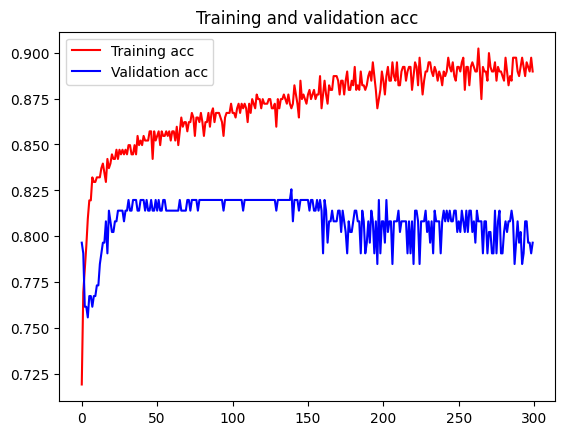

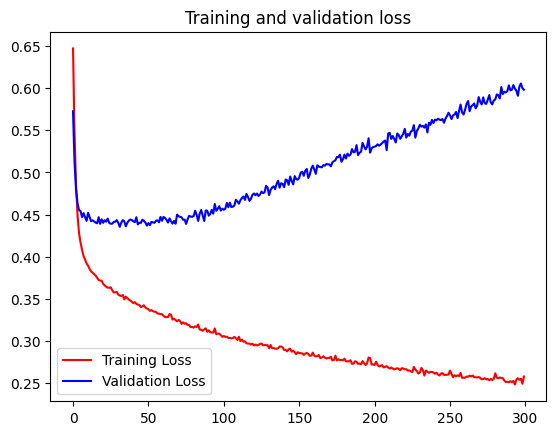

In [70]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [71]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 11ms/step - loss: 0.7335 - acc: 0.7832


[0.7334921956062317, 0.7832167744636536]

In [72]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = model.predict(x_test)

5/5 [==============================] - 0s 7ms/step


In [73]:
y_hat[0]

array([0.08039293], dtype=float32)

In [74]:
# threshold를 ( )
threshold = 0.5
y_hat[0] >= threshold

array([False])

In [75]:
y_test = y_test.values
y_test[0]

0

In [76]:
threshold = 0.5
result=[]
for i in y_hat:
  if i >= threshold:
    result.append(1)
  else:
    result.append(0)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        91
           1       0.71      0.67      0.69        52

    accuracy                           0.78       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.78      0.78      0.78       143



In [78]:
print(confusion_matrix(y_test,result))

[[77 14]
 [17 35]]
